<div style="width: 100%; background-image: url('images/genetics.jpg');  background-repeat: no-repeat;
  background-attachment: fixed;
  background-size: 100% 100%;
  background-size: cover; border-radius: 10px;">
    <br>
    <br>
    <br>
    <br>
    <br>
    <div style="padding: 30px; color: white;">
        <center>
            <h1 style="color: white; font-family: serif;">Heurística Otimização</h1>
            <br>
            <br>
            <h1 style="font-size: 32px; font-family: serif;"> Trabalho de Grupo – Algoritmo de genética</h1> 
            <br>
            <br>
        </center>
        <br>
        <br>
        <p style="font-size: 18px; font-family: serif;"><b>Realizado por:</b></p>
        <p style="font-size: 18px; font-family: serif; margin-left: 20px;"><b>Catarina Pontes</b></p>
        <p style="font-size: 18px; font-family: serif; margin-left: 20px;"><b>Gabriel Pais</b></p>
        <p style="font-size: 18px; font-family: serif; margin-left: 20px;"><b>Rodrigo Sarroeira</b></p>
        <p style="font-size: 18px; font-family: serif; margin-left: 20px;"><b>Tiago Grancho</b></p>
    </div>
</div>

<br>
<br>

<div style="background-image: linear-gradient(to right, #26b1c1 , #dee823); padding: 20px; color: white; border-radius: 10px;">
    <center><h1> Função 1: Gera n soluções </h1></center>
</div>

<p style="line-height: 25px; font-size: 16px; text-align: justify;">Primeiramente temos de gerar <b>n cromossomas</b> que representem soluções admissíveis para o nosso problema de escolha de produtos. Nesse sentido vamos recorrer à função <b>runif(6)</b>, que devolve um vetor binário de 6 posições escolhidas aleatoriamente. Este processo será repetido <b>n + k</b> vezes, visto que o ciclo tem como critério de paragem a obtenção de n soluções <b>únicas e admissíveis</b>.
<br>
<br>
<b>Nota:</b> k será o número de cromossomas gerados que eram repetidos ou não admissíveis.
</p>

In [1]:
generate_population = function(n) {

    raw_population = list()
    iter = 0

    while (length(unique(raw_population)) != n ) {
        
        cromossoma = round(runif(6))
        
        if (is_feasable(cromossoma)) {
            iter = iter + 1
            raw_population[iter] =  list(cromossoma)
        }
        
    }

    return(unique(raw_population))
}

<div style="background-image: linear-gradient(to right, #26b1c1 , #dee823); padding: 20px; color: white; border-radius: 10px;">
    <center><h1> Função 2: Verifica se um cromossoma é admissível </h1></center>
</div>

<p style="line-height: 25px; font-size: 16px; text-align: justify;">Esta função recebe como <b>input</b> um cromossoma de 6 posições e verifica se este é admisível. Para ser admissível, o somatório do produto do cromossoma com o vetor dos volumes dos produtos terá que ser inferior a 50. O output da função é boleano, <b>TRUE or FALSE</b>.
</p>    

In [2]:
is_feasable = function (vector) {
    
    volume = c(40, 10, 15, 5, 20, 35)
    total_volume = 0
    total_volume = sum(vector * volume)
        
    if (total_volume <= 50) {
        return(TRUE)
    }
    
    else {
        return(FALSE)
    }
    
}

<div style="background-image: linear-gradient(to right, #26b1c1 , #dee823); padding: 20px; color: white; border-radius: 10px;">
    <center><h1> Função 3: Devolve os cromossomas admissíveis </h1></center>
</div>

<p style="line-height: 25px; font-size: 16px; text-align: justify;">
    Esta função percorre uma lista de cromossomas e devolve os que são admissíveis para o problema, invocando a função <b>is_feasable</b>, anteriormente explicada, para verificar a admissibilidade.
</p>   

In [3]:
find_feasable = function(popution) {
    
    feasable = list()

    for (i in popution) {
        
        if (is_feasable(i)) {
            
            feasable = append(feasable, list(i))
        }
        
    }
    
    return(feasable)
}

<div style="background-image: linear-gradient(to right, #26b1c1 , #dee823); padding: 20px; color: white; border-radius: 10px;">
    <center><h1> Função 4: Calcula a aptidão dos cromossomas</h1></center>
</div>

In [4]:
scores = function (population) {
    
    price = c(1000, 400, 450, 300, 150, 500)
    scores = list()

    for (i in population) {
        score = sum(i * price)
        scores = append(scores, score)
    }
    
    return(scores)
}

<div style="background-image: linear-gradient(to right, #26b1c1 , #dee823); padding: 20px; color: white; border-radius: 10px;">
    <center><h1> Função 5: Determina os n pais, por torneio </h1></center>
</div>

<p style="line-height: 25px; font-size: 16px; text-align: justify;">
    O objetivo desta função é selecionar, da população inicial, os <b>pais</b>, ou seja, os n cromossomas que vão dar origem à geração seguinte. Para isso vamos utilizar uma seleção em <b>torneio</b>, o vencedor do torneio é o melhor dos k comossomas retirados aleatóriamente da população.
</p>   

In [5]:
find_parents = function(feasable, n_parents, k_competitors) {
    
    # Input validations
    if (n_parents %% 2 != 0) {
        return("n_parents must be an even number")}
    
    if (n_parents > length(feasable)) {
        return("n_parents must be smaller than the aize of feasable")}
    
    if (k_competitors > length(feasable)) {
        return("n_competitors must be smaller than the size of feasable")}
    
    
    # Script
    parents = list()
    
    for (i in c(1:n_parents)) {

        sample = sample(feasable, k_competitors, replace=FALSE)
        
        scores = scores(sample)
        max = which.max(scores)
        parent = sample[[max]]
        parents = append(parents, list(parent))
        
    }

    return(parents)
    
}  

<div style="background-image: linear-gradient(to right, #26b1c1 , #dee823); padding: 20px; color: white; border-radius: 10px;">
    <center><h1> Função 6: Operador de crossover a dois pontos </h1></center>
</div>

<p style="line-height: 25px; font-size: 16px; text-align: justify;">
    Esta função representa um operador de crossover a dois pontos. Primeiramente a função verifica se os cromossomas recebidos têm a mesma dimensão, de segiuida parte cada cromossoma em 3 partes e troca as duas posições centrais, dando origem a dois novos cromossomas.
</p>   

In [6]:
crossover = function (vet1, vet2) {
    
    if (length(vet1) == length(vet2)) {
        
        vet1_n = c(vet1[1:2], vet2[3:4], vet1[5:6])
        vet2_n = c(vet2[1:2], vet1[3:4], vet2[5:6])
        
        return (list(vet1_n, vet2_n))} 
    
    else {print("The vectors don't have the same dimensions")}   
    
}

<div style="background-image: linear-gradient(to right, #26b1c1 , #dee823); padding: 20px; color: white; border-radius: 10px;">
    <center><h1> Função 7: Operador de mutação (bitswap) </h1></center>
</div>

<p style="line-height: 25px; font-size: 16px; text-align: justify;">
    Esta função recebe como input um cromossoma e uma probabilidade. De seguida, a função percorre cada um dos genes do cromossoma e gera um número aleatório que representa uma probabilidade, caso essa probabilidade seja menor que a probabilidade definida no input, o gene é trocado (bitswap).
</p>   

In [7]:
mutate = function(cromossoma, mutation_prob) {
    
    for (i in 1:6) {
        
        chance = runif(1)
        mutate = chance < mutation_prob
    
        if (mutate) {
        
            if (cromossoma[i] == 0) {
                cromossoma[i] = 1}
        
            else {cromossoma[i] = 0}
 
        }
        
    }
    
    return(list(cromossoma))
    
}

<div style="background-image: linear-gradient(to right, #26b1c1 , #dee823); padding: 20px; color: white; border-radius: 10px;">
    <center><h1> Função 8: Cria cromossomas filho </h1></center>
</div>

<p style="line-height: 25px; font-size: 16px; text-align: justify;">
    Esta função tem como objetivo gerar os filhos a partir dos pais. Os filhos são gerados através da aplicação de crossovers entre dois pais com uma taxa de mutação associada, nesse sentido são invocadas as funções <b>crossover</b> e <b>mutate</b>, anteriormente desenvolvidas.
</p>   

In [8]:
# Gerar os filhos 

create_filhos =  function(parents, mutation_prob) {

    filhos = list()
    k = length(parents)/2

    for (i in 1:k) {

        new_solutions = crossover(parents[[i]], parents[[i + k]]) #####
        filhos = append(filhos, mutate(new_solutions[[1]], mutation_prob))
        filhos = append(filhos, mutate(new_solutions[[2]], mutation_prob))

    }

    return(filhos)
    
}

<div style="background-image: linear-gradient(to right, #26b1c1 , #dee823); padding: 20px; color: white; border-radius: 10px;">
    <center><h1>Função 9: Transforma filhos em soluções admissíveis</h1></center>
</div>

<p style="line-height: 25px; font-size: 16px; text-align: justify;">
    Esta função tem como objetivo receber um lista de cromossomas e, dos que são não admissíveis torná-los admissíveis. Para tal vamos removendo o cromossoma com menor preço por volume, até que a solução seja admissível, ou seja, que o volume combinado dos produtos seja inferior a 50cm3.
</p>   

In [9]:
make_admissable = function(new_solutions, text) {
    
    
    output = list()

    for (i in 1:length(new_solutions)) {

        solution = new_solutions[[i]]

        if (is_feasable(solution)) {
            output = append(output, list(solution))
            if (text) {print(paste(i, " Solution is feasable", sep=":"))}}
 
        else {
            if (text) {print(paste(i, " Solution is unfeasable", sep=":"))}
            
            volume = c(40, 10, 15, 5, 20, 35)
            price = c(1000, 400, 450, 300, 150, 500)

            while (is_feasable(solution) == FALSE) {
                
                if (text) {print(paste(i, " Solution needs change", sep=":"))}

                pbv = price * solution / volume   # pbv - price by volume
                pbv[pbv == 0] = 1000000

                index_to_remove = which.min(pbv)
                solution[index_to_remove] = 0
                if (text) {print(solution)}}
                

            output = append(output, list(solution))

        }

    }
    
    return(output)

}

<div style="background-image: linear-gradient(to right, #26b1c1 , #dee823); padding: 20px; color: white; border-radius: 10px;">
    <center><h1> Função 10: Cria uma nova geração </h1></center>
</div>

<p style="line-height: 25px; font-size: 16px; text-align: justify;">
    Esta função representa o último passo do processo, a substituição da geração (evolução). Após os pais estarem definidos e os filhos criados, esta função vai retirar os n cromossomas menos aptos e substitui-los pelos n filhos. Deste modo, garantimos que a nossa população vai sempre evoluindo, visto que os cromossomas menos aptos acabam por ser retirados (mortos).
</p>   

In [10]:
# Substituir a geração

replace_generation = function(feasable, filhos) {

    n = length(feasable) - length(filhos)
    scores = scores(feasable)
    
    max_indexes = c()

    for (i in 1:n) {
        max_index = which.max(scores)
        scores[max_index] = 0
        max_indexes = append(max_indexes, max_index)
    }

    max_indexes = unlist(max_indexes)
    feasable = feasable[max_indexes]
    feasable = append(feasable, filhos)
 
    return(feasable)
}

<div style="background-image: linear-gradient(to right, #26b1c1 , #dee823); padding: 20px; color: white; border-radius: 10px;">
    <center><h1> Função Final: Algoritmo genético </h1></center>
</div>

<p style="line-height: 25px; font-size: 16px; text-align: justify;">
    O nosso algoritmo, como demostrado anteriormente, é composto por várias secções. Primeiramente é necessário gerar a população inicial. De seguida, da atual população são escolhidos os <b>n</b> pais, através de um método de seleção via torneio com <b>k</b> cromossomas. Após a seleção dos pais estes são utilizados para gerar os filhos, através da aplicação de crossovers e mutações. Como os filhos podem não ser admissíveis temos de os tornar em soluções admissíveis, tendo como critério o preço por volume. Por fim, são retirados os <b>n</b> piores cromossomas da população e substituidos pelos <b>n</b> filhos, deste modo a geração fica completa. Este processo é repetido <b>g</b> vezes, representando as <b>g</b> gerações
</p>   

In [11]:
main = function(n, n_genaration, n_parents, k_competitors, mutation_prob, text) {
    
    # Gerar população inicial
    feasable = generate_population(n)
    
    for (gen in 1:n_genaration) {
        
        if (text) {
            print("")
            print(paste("######## Generation ", gen, " ########"))}
        
        # Selecionar n pais por meio de torneio
        parents = find_parents(feasable, n_parents, k_competitors)

        # Gerar os filhos
        filhos = create_filhos(parents, mutation_prob)
        filhos = make_admissable(filhos, text)
    
        # Substituir geração
        feasable = replace_generation(feasable, filhos)
        
    }
    
    scores = scores(feasable)
    max_index = which.max(scores)
    best_solution = feasable[max_index]
    best_value = scores[max_index]
    
    return(c(best_solution, best_value))
    
}

<div style="background-image: linear-gradient(to right, #26b1c1 , #dee823); padding: 20px; color: white; border-radius: 10px;">
    <center><h1> Aplicação do algoritmo genético </h1></center>
</div>

In [12]:
pop = 15                # dimension of the inicial population
gen = 15                # number of generations
n_parents = 6           # número de pais por geração
n_competitors = 4       # number of competitors in the tornament
mutation_prob = 0.05    # chance of mutation of a gene
text = TRUE             # TRUE: output final e processo; FALSE: apenas output final

solution = main(pop, gen, n_parents, n_competitors, mutation_prob, text)
solution

[1] ""
[1] "######## Generation  1  ########"
[1] "1: Solution is feasable"
[1] "2: Solution is unfeasable"
[1] "2: Solution needs change"
[1] 0 1 1 1 0 0
[1] "3: Solution is unfeasable"
[1] "3: Solution needs change"
[1] 0 1 1 0 0 0
[1] "4: Solution is feasable"
[1] "5: Solution is feasable"
[1] "6: Solution is unfeasable"
[1] "6: Solution needs change"
[1] 0 1 0 1 0 0
[1] ""
[1] "######## Generation  2  ########"
[1] "1: Solution is unfeasable"
[1] "1: Solution needs change"
[1] 0 0 1 1 0 0
[1] "2: Solution is feasable"
[1] "3: Solution is feasable"
[1] "4: Solution is unfeasable"
[1] "4: Solution needs change"
[1] 0 1 1 0 0 0
[1] "5: Solution is feasable"
[1] "6: Solution is feasable"
[1] ""
[1] "######## Generation  3  ########"
[1] "1: Solution is unfeasable"
[1] "1: Solution needs change"
[1] 0 0 1 1 0 0
[1] "2: Solution is feasable"
[1] "3: Solution is feasable"
[1] "4: Solution is unfeasable"
[1] "4: Solution needs change"
[1] 0 1 1 1 0 0
[1] "5: Solution is feasable"
[1] "6: S

[[1]]
[1] 1 1 0 0 0 0

[[2]]
[1] 1400

<div style="background-image: linear-gradient(to right, #26b1c1 , #dee823); padding: 20px; color: white; border-radius: 10px;">
    <center><h1> Interpretação da solução </h1></center>
</div>

In [14]:
# Solução final 

products = c("PC", "Máquina fotográfica", "Notebook", "Smartphone", "Impressora", "Consola de jogos")
take = c()

for (i in 1:6) {
    
    if (solution[[1]][i] == 1) {
        take = c(take, products[i])}}
    
price = sum(solution[[1]] * c(1000, 400, 450, 300, 150, 500))
volume =  sum(solution[[1]] *  c(40, 10, 15, 5, 20, 35))

print(paste("Levar:",take))
print(paste("Volume:", volume))
print(paste("Price:", price))

[1] "Levar: PC"                  "Levar: Máquina fotográfica"
[1] "Volume: 50"
[1] "Price: 1400"


<div style="background-image: linear-gradient(to right, #26b1c1 , #dee823); padding: 20px; color: white; border-radius: 10px;">
    <center><h1> Performance do algoritmo para diferentes gerações </h1></center>
</div>

In [15]:
successes = list()

for (n_ger in 1:30) {
    
    success = 0

    for (i in 1:100) {
        if (main(15, n_ger, 6, 4, 0.05, FALSE)[2] == 1400) {
            success = success + 1
        }
        
    }
        
    successes = append(successes, success)
        
}

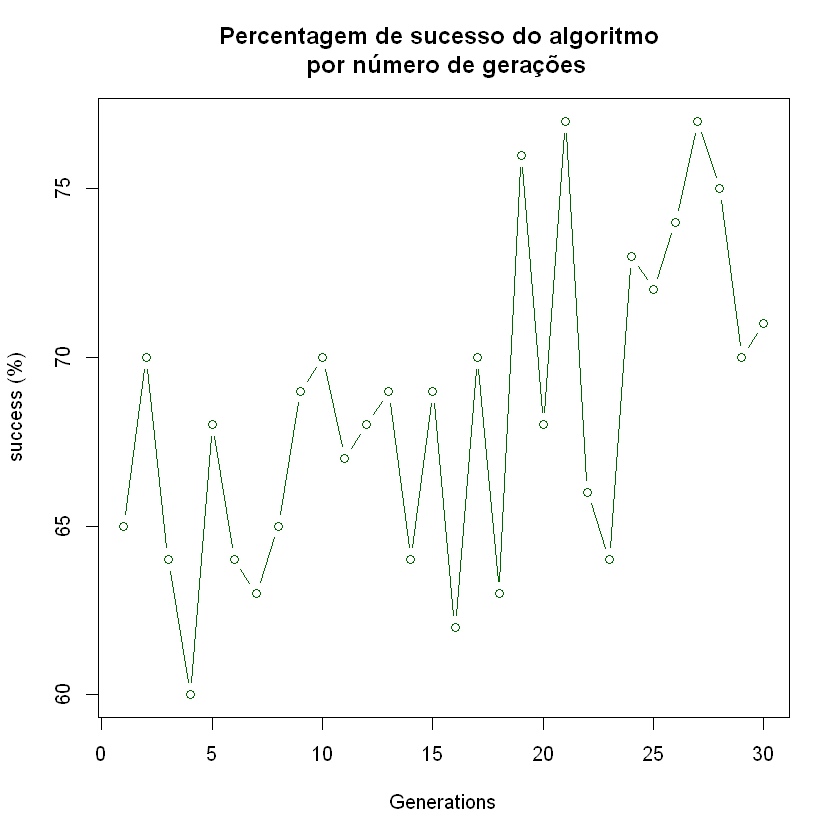

In [31]:
plot(c(1:30), successes, type="b", 
     main="Percentagem de sucesso do algoritmo \n por número de gerações", 
     xlab="Generations",
     ylab="success (%)",
    col="darkgreen")

<div style="background-image: linear-gradient(to right, #26b1c1 , #dee823); padding: 20px; color: white; border-radius: 10px;">
    <center><h1> Aplicação do algoritmo genético (etapas por iteração) </h1></center>
</div>

## Gerar população

Como o nosso cromossoma é composto por 6 genes (0 ou 1), apenas existem 2^6 = 64 combinações. Sendo assim, como este é um problema pequeno vamos gerar apenas 10 soluções iniciais.

In [13]:
# Gerar soluções

pop = generate_population(15)
pop

[[1]]
[1] 0 0 1 0 1 0

[[2]]
[1] 0 1 0 1 1 0

[[3]]
[1] 0 0 1 0 0 0

[[4]]
[1] 1 0 0 0 0 0

[[5]]
[1] 0 0 0 1 1 0

[[6]]
[1] 0 0 1 1 1 0

[[7]]
[1] 0 1 1 0 1 0

[[8]]
[1] 0 0 1 1 0 0

[[9]]
[1] 0 0 1 0 0 1

[[10]]
[1] 0 0 0 1 0 0

[[11]]
[1] 0 1 1 1 1 0

[[12]]
[1] 0 1 1 1 0 0

[[13]]
[1] 0 1 0 0 0 0

[[14]]
[1] 0 1 0 0 1 0

[[15]]
[1] 0 0 0 1 0 1

## Selecionar os pais

Para selecionar os dois cromossomas com melhor aptidão recorremos à seguinte função: <br><br><b>Max Fitness</b> = 1000 * x1 +  400 * x2 + 450 * x3 + 300 * x4 + 150 * x5 + 500 * x6

In [18]:
# Selecionar 6 pais por meio de torneio

parents = find_parents(pop, 6, 4)
parents

[[1]]
[1] 0 1 1 1 0 0

[[2]]
[1] 1 0 0 1 0 0

[[3]]
[1] 0 1 0 1 0 1

[[4]]
[1] 0 1 1 0 1 0

[[5]]
[1] 0 1 1 0 1 0

[[6]]
[1] 0 1 0 1 0 1

## Criar os filhos

Criar filhos a patir de crossover entre os pais, com uma chance de mutação de genes de 0.05

In [19]:
filhos = create_filhos(parents, 0.05)
filhos

[[1]]
[1] 0 1 0 0 0 1

[[2]]
[1] 0 1 1 1 1 0

[[3]]
[1] 1 0 1 0 0 0

[[4]]
[1] 0 1 0 1 1 0

[[5]]
[1] 0 1 0 1 0 1

[[6]]
[1] 0 1 0 1 0 1

## Tornar os filhos admissíveis

Tornar os cromossomas filhos em soluções admissíveis para o nosso problema, caso ainda não o sejam.

In [20]:
filhos = make_admissable(filhos, TRUE)

[1] "1: Solution is feasable"
[1] "2: Solution is feasable"
[1] "3: Solution is unfeasable"
[1] "3: Solution needs change"
[1] 0 0 1 0 0 0
[1] "4: Solution is feasable"
[1] "5: Solution is feasable"
[1] "6: Solution is feasable"


## Replace population

Substituir o piores cromossomas pelos filhos, obtendo assim a geração seguinte.

In [21]:
next_generation = replace_generation(pop, filhos)
next_generation

[[1]]
[1] 1 0 0 1 0 0

[[2]]
[1] 0 1 0 1 0 1

[[3]]
[1] 0 1 1 1 0 0

[[4]]
[1] 1 0 0 0 0 0

[[5]]
[1] 0 1 1 0 1 0

[[6]]
[1] 0 0 1 0 0 1

[[7]]
[1] 0 1 1 0 0 0

[[8]]
[1] 0 0 0 1 0 1

[[9]]
[1] 0 0 1 1 0 0

[[10]]
[1] 0 1 0 0 0 1

[[11]]
[1] 0 1 1 1 1 0

[[12]]
[1] 0 0 1 0 0 0

[[13]]
[1] 0 1 0 1 1 0

[[14]]
[1] 0 1 0 1 0 1

[[15]]
[1] 0 1 0 1 0 1